Meat Freshness Classification
by Sam Herold and Cassidy Robers

# Introduction
### **Summary**
The goal of this project is to classify chicken as fresh or spoiled (2 labels), and beef as fresh, half-fresh or spoiled (3 labels). We used convolutional neural networks in Keras to do this. A goal is to be able to have a user upload an image of beef or chicken and have it classified (we did not get to do this, but it is the context of the problem). Examples of images from the datasets are in the 'LoadData' sections of the notebook.

### **Chicken Dataset**
This dataset has around 450 observations of very close up, clear images of raw chicken, size 400x400. It is balanced and has an equal number of spoiled and rotten images.

Pros:
- You can visually tell the difference between a spoiled image and a clean one from the color and markings, so the model should easily have high accuracy.
- It is pretty generalizable to data outside of the dataset, as long as a user can take an image that is very close up and clear.

Cons:
- If a user cannot take a very close up and clear image, we think the model will fail. May not generalize well to user imaes.
- All of the images are in the exact same context.
- It is a somewhat small dataset.

Ideally, the dataset would contain images all in different contexts, i.e. different camera taking techniques, different parts of the chicken, etc. This is not that dataset. This can classify a very specific type of raw chicken image. Adding another couple datasets to this one would have been ideal, but none could be found. So while it does classify the test set well, it may do very badly on new user uploaded images for example because the model is trained on a very specific type of image. Random crop, rotation, etc. will help will this though

### **Beef Dataset**
This dataset has around 1250, 412x412 observations of different angles of huge pieces of beef. It has 3 classes - fresh, half-fresh or spoiled. We thought about just combining half-fresh into spoiled, but decided to go foward with multiclass classification instead for the challenge. It is slightly imbalanced with about 1/3 less spoiled images than fresh and half-fresh, but we don't suspect it will be problematic. 

Pros:
- The images are collected from all different angles and zoom. Many different sides and locations of the beef are taken. This is a diverse dataset that could generalize well for user uploaded images.
- It is a good sized dataset.

Cons:
- The images are only from a few large pieces of meat, but imaged all over and from all different sides a ton of times. This could do bad for generalizing for user.
- Slightly Imbalanced.

### **Preprocessing**
We first did a train-val-test split of 60-20-20. The datasets are big enough to this comfortably. Next, we wanted to augment the data so the network could see more images and generalize better. We found ImageDataGenerator in Keras. Every epoch it crops, rotates, zooms, etc., the data differently. This greatly reduces overfitting because 'new' images are being shown every epoch and the model can't memorize the training set. It also normalizes between 0 and 1. We did batches of 32. Due to training times, we could not optimize the preprocessing, so this is the same every training.

### **Model Structure/Hyperparameters**
Model Structure is the main 'hyperparameter' we are going to test. Our initial plan was to do train/testing for both datasets with the VGG16 and MobileNetV2 architectures, each with pretrained parameters, and non-trainable parameters (so four models tested per dataset). We picked these because they are very popular, optionaly pretrained, image classification model structures, and should do the trick for this problem. They are feed foward CNN's, with MobileNet essentially being a lighter weight version of VGG16.

We have limited access to a GPU, so training is possible, but slow. The ImageDataGenerator is very, very slow.

We learned after some tests that training the model's convolutional parameters  for this problem seems uneccesary. It greatly increased training time and was actually bad for accuracy. We think it would take much longer to converge, especially with new images every epoch. Moving forward, we only used the pretrained VGG16 and pretrained MobileNetV2 (2 models per meat type). So basically we are comparing MobileNetV2 and VGG16 performance.

We added 3 dense layers to the ends of the pretrained models to be able to predict for our specific problem. We picked 3 arbitrarily. These are the layers with weights that are actually being trained. We also used Adam for our optimizer, and sparse_categorical_crossentropy for our loss. These are standard treatments and we are confident that they can get the job done. 

We began by training each model for 100 epochs, but then dropped it down to 50 for time constraints and because it appears to not greatly effect accuracy. We documented loss and accuracy by epoch. This is basically like testing the 'epoch' hyperparameter becaue we can see accuracy at every epoch.

Final structure:

- Pretrained MobilNetV2/VGG16 (with three additional dense layers predict down to our labels)
- 50 epochs
- ADAM optimizer
- Batch size = 32
- loss = sparse_categorical_crossentropy


### **Baselines**
The baseline accuracy for the chicken (2 balanced classes) is 50%, and for beef (3 unbalanced classes) is around 36%, which is the percentage of observations of the most common class. We didn't do any baselines with other, non-CNN models because none of them can understand images like a CNN does, and the accuracies wouldnt even be comparable.







# Results
Accuracy/loss graphs, confusion matrixes, and numerical metrics are in the notebook below. Here we will explain the general results. In the notebook there will be more specific analysis under each metric.
### **Beef**
As expected, both models could easily handle this task. The results from the two architectures are almost exactly the same, while also taking the same amount of time to train. They both had an accuracy of around 0.90. MobileNet has a .002 better f1 score, but that is not significant enough to make any judgements. For beef we have no preference between the two models, but would pick MobileNet just becauase it is more light weight.  We saw zero signs of overfitting thanks to the DataGenerator. The models seem to have converged within 50 epochs, and we suspect very small increase in accuracy if we let it run longer. Again, the model does good on the test set, but how it would do on user images from another context is hard to say. We hope to test this in the future. \
\
It seems that the models main weakness is accidentally predicting half-spoiled images as fresh too often (see confusion matrixes below). This is very reasonable because images in these two classes are often quite similar. Both models suffer from this. We are unsure how to fix this to be honest. This is worrysome because we could be saying food is safe when it was not. Fixing this would be very important for an app. 

### **Chicken**
VGG16 had around 90% accuracy.
MobileNetV2 had around 83%.

This was not quite expected for MobileNet and even VGG16. We predicted almost perfect accuracy because the images seemed very seperable and they were all from the same context. The problem seems to be is not enough epochs/training examples. With only 350 training examples, and them changing every epoch from ImageDataGenerator, we do not think that the models had time to converge, expecially MobileNet because it is less robust. Also (from the accuarcy/loss graphs), there is a lot of variation in accuracy through the first 50 epochs. This tells us that the model has not converged. We do not suspect overfitting because the validation and training move together. 

~90% accuracy using VGG16 is decent, but it could definetly do better with more epochs. To make a predictor for a user we would retrain these with more epochs. 

In the MobileNet, accourding to the confusion matrix, it often mistook truly spoiled images as not spoiled. This also happened in the beef, so there maybe may a deeper reason that this is happenening. Again, we think more epochs would get rid of this and predict very well.

In summary, we think we could get more accuracy with more epochs because with a small dataset that changes every epoch, the model does not converge. We think in theory the model can get very, very good accuracy

### **Conclusions and What We Learned**
- We do not want a model to overpredict fresh, which is exactly what we see in both datasets. For rotten food, it is better to air on the side of caution. If anything we want it to overpredict rotten. 
- More epochs are needed in models with low amounts of training data it appears. 
- Pretrained classification models are extremely powerful and can be extended to many projects.
- Image augmentation is awesome and does a great job at overfitting, but it might neccesitate more epochs.
- A gpu is absolutely neccesary for NeuralNets.
- In a dataset that is easily seperable by a CNN, a imbalanced dataset seems to be no matter. Also multiclass classification can be as easy as binary depending on the dataset
- Numpy is king!

### **Future Work**
We would've liked to build an app for this, but did not have time. To do this we would probably pick the lighter wieght MobileNet (over VGG16) and do a lot more epochs to maximize accuracy. It is still hard to say how this will do on user uploaded images, something we did not get to test. The thing that would really help us is better, bigger, more diverse datasets.






# Contributions
Both:
- Deciding on the method
    - Finding model architectures
    - Deciding hyperparameters
    - Finding how to do image augmentation
    - Deciding general layout, process and implementation
- Write up at the end
- Trouble shooting

Cassie Roberts:
- Loading/Visualizing datasets
- Running training and analysis on chicken dataset

Sam Herold:
- Buiding the models/testing metrics 
- Running training and analysis on beef dataset


In [37]:
#Basic Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from PIL import Image
import os

from keras.applications import VGG16
from keras.applications import MobileNetV2
from keras.models import Model
from keras.layers import Dense, Flatten

#metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix

#Set up file enviroment
from google.colab import drive
drive.mount("/content/gdrive")


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# Beef Classfication Code

## Load Dataset

In [ ]:
#load data
#0 for fresh, 1 for half-fresh, 2 for spoiled
def loadData(trainOrTest):
  labels = []
  imgs = []
  for filename in os.listdir('/content/gdrive/My Drive/MeatFreshness/' + trainOrTest): #loop through file in train or test
    f = os.path.join('/content/gdrive/My Drive/MeatFreshness/' + trainOrTest, filename)
    #determine label by name of file
    if 'HALF-FRESH-' in f:
      labels.append(1)
    elif 'SPOILED-' in f:
      labels.append(2)
    elif 'FRESH-' in f:
      labels.append(0)
    imgs.append(np.array(Image.open(f))) #open image as numpy assay
  print(len(imgs) == len(labels)) #confirm X and y are same size
  return np.asarray(imgs), np.asarray(labels) # convert to numpy and return X and y

In [ ]:
X_train, y_train = loadData('train')
X_eval, y_eval = loadData('valid')
X_valid, X_test, y_valid, y_test =  train_test_split(X_eval, y_eval , train_size= .5, random_state=1)

True
True


In [ ]:
#shuffle
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train, random_state=42)

In [ ]:
"Train sizes (.6 of dataset):" , X_train.shape, y_train.shape

('Train sizes (.6 of dataset):', (710, 416, 416, 3), (710,))

In [ ]:
"Valid sizes (.2 of dataset):" , X_valid.shape, y_valid.shape

('Valid sizes (.2 of dataset):', (225, 416, 416, 3), (225,))

In [ ]:
X_test = X_test/255
"Test sizes (.2 of dataset):" , X_test.shape, y_test.shape

('Test sizes (.2 of dataset):', (226, 416, 416, 3), (226,))

710, 416x416 color (3 channels) images in train\
225, 416x416 color (3 channels)  images in valid\
226, 416x416 color (3 channels) images in valid





Distributions of Training labels


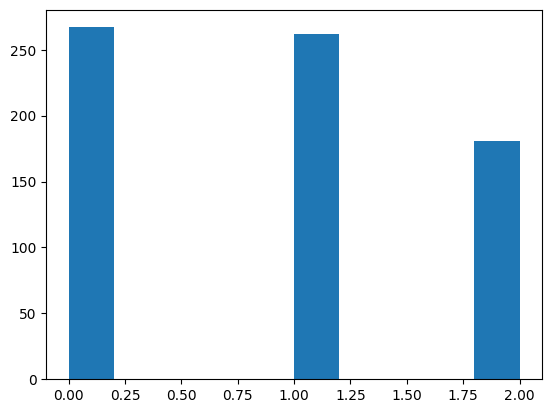

In [ ]:
plt.hist(y_train);
print("Distributions of Training labels")

Seems a little unbalanced, hoping to not have to worry about it.

Examples of some images and their labels


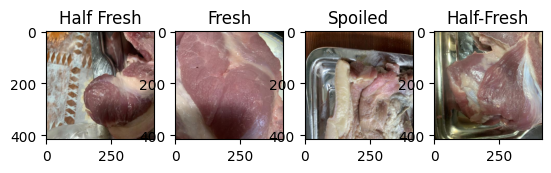

In [ ]:
plt.subplot(141)
plt.imshow(X_train[0])
plt.title("Half Fresh")
plt.subplot(142)
plt.imshow(X_train[1])
plt.title("Fresh")
plt.subplot(143)
plt.imshow(X_train[2])
plt.title("Spoiled")
plt.subplot(144)
plt.imshow(X_train[3])
plt.title("Half-Fresh");
print("Examples of some images and their labels")

Preprocessing (all done through 'ImageDataGenerator')

In [ ]:
#This feeds a new combination of these augmentations to the data every epoch.
#We picke alot of the options so the images are very diverse.
dataGenTrain = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.4,
    channel_shift_range=0.2,
    fill_mode='nearest',
    cval=0.0,
    horizontal_flip=True,
    vertical_flip=True,
    rescale=1/255,
)
#only a rescale for the validation/test
dataGenTest = ImageDataGenerator(
    rescale=1/255,
)

In [ ]:
dataGenTrain.fit(X_train)
dataGenTest.fit(X_valid)

## Modeling and Testing Pretrained VGG16





In [ ]:
# Load the VGG16 model without the top
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(416, 416, 3))

# Freeze
for layer in base_model.layers:
    layer.trainable = False

# Add three dense layers
x = Flatten()(base_model.output)
x = Dense(256, activation='relu')(x)
x = Dense(128, activation='relu')(x)
# condese down to prediction between three classes
predictions = Dense(3, activation='softmax')(x)

# Create
model = Model(inputs=base_model.input, outputs=predictions)

# Compile
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()


58889256/58889256 [==============================] - 0s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 416, 416, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 416, 416, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 416, 416, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 208, 208, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 208, 208, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 208, 208, 128)     147584    
                                                              

In [ ]:
#Train and save history
history = model.fit(dataGenTrain.flow(X_train, y_train, batch_size=32),
          validation_data=dataGenTest.flow(X_valid, y_valid,
         batch_size=32), steps_per_epoch=len(X_train) / 32, epochs=50, verbose = 1)
#Save model
model.save('PretrainedVGG16BeefModel')

Epoch 1/50
22/22 [==============================] - 63s 2s/step - loss: 5.5343 - accuracy: 0.4028 - val_loss: 0.6746 - val_accuracy: 0.6800
Epoch 2/50
22/22 [==============================] - 42s 2s/step - loss: 0.8768 - accuracy: 0.6282 - val_loss: 0.5851 - val_accuracy: 0.7422
Epoch 3/50
22/22 [==============================] - 41s 2s/step - loss: 0.7247 - accuracy: 0.6915 - val_loss: 0.5315 - val_accuracy: 0.7867
Epoch 4/50
22/22 [==============================] - 41s 2s/step - loss: 0.5750 - accuracy: 0.7394 - val_loss: 0.4860 - val_accuracy: 0.7911
Epoch 5/50
22/22 [==============================] - 44s 2s/step - loss: 0.5102 - accuracy: 0.7592 - val_loss: 0.5680 - val_accuracy: 0.7556
Epoch 6/50
22/22 [==============================] - 39s 2s/step - loss: 0.5377 - accuracy: 0.7690 - val_loss: 0.3827 - val_accuracy: 0.8622
Epoch 7/50
22/22 [==============================] - 39s 2s/step - loss: 0.5692 - accuracy: 0.7507 - val_loss: 0.3030 - val_accuracy: 0.8622
Epoch 8/50
22/22 [==

In [ ]:
#model = tf.keras.models.load_model('/content/gdrive/MyDrive/PretrainedVGG16BeefModel')

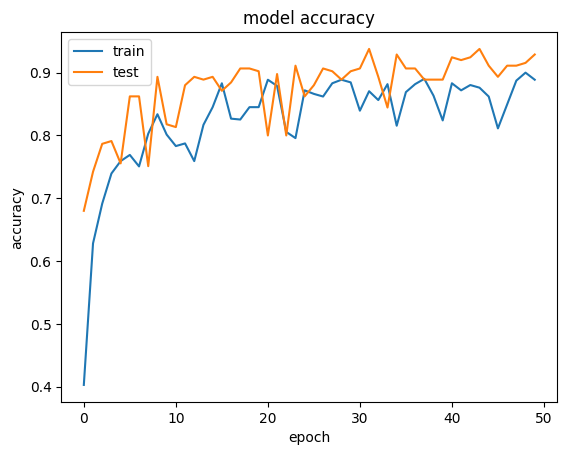

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Model accuracy seems to be leveling out, looks like it still go up further. Test and validation seems to be moving in parallel, meaning the model is not overfitting.

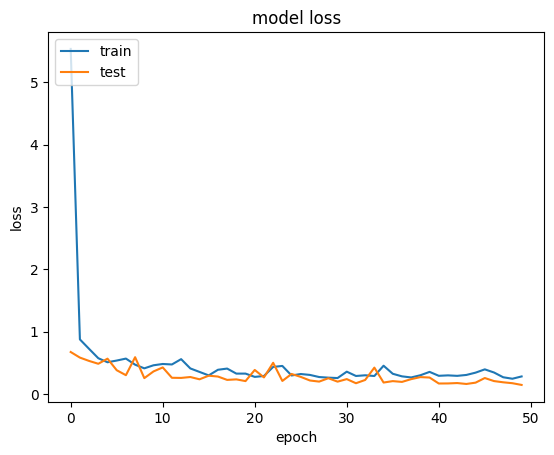

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Loss seems to have converged. Again both move together so no sign of overfitting. It looks light it trending very slightly down though.

In [ ]:
model.evaluate(X_test, y_test);

8/8 [==============================] - 5s 577ms/step - loss: 0.2285 - accuracy: 0.9071


Good, expected accuracy and loss on the test set.

In [ ]:
#Predict
y_pred = np.argmax(model.predict(X_test),axis = 1)

#Create confusion matrix and normalizes it over predicted (columns)
result = confusion_matrix(y_test, y_pred , normalize='pred')
result

8/8 [==============================] - 4s 486ms/step


array([[0.84705882, 0.04878049, 0.        ],
       [0.15294118, 0.92682927, 0.03389831],
       [0.        , 0.02439024, 0.96610169]])

Sklearn confusion matrix shows actual label on left and predicted label on top. This means the model never mispredicted fresh vs spoiled, but had issues with half fresh. The main issue is that it often picks fresh rather than half fresh, which is understandable based on the dataset. We do not know how to fix this though. All of the other missclassifications are small enough to be irrelevant.

In [ ]:
print("precision: " , np.round(precision_score(y_test, y_pred , average="macro"), 4))
print("recall: " , np.round(recall_score(y_test, y_pred , average="macro"), 4))
print("f1: " , np.round(f1_score(y_test, y_pred , average="macro"), 4))

precision:  0.9133
recall:  0.9162
f1:  0.913


Predision, recall and f1 are all normal. Again the only issue has to do with overpredicting fresh for half-fresh.

1/1 [==============================] - 0s 40ms/step
[2]
1/1 [==============================] - 0s 33ms/step
[2]
1/1 [==============================] - 0s 34ms/step
[1]
1/1 [==============================] - 0s 39ms/step
[2]
Examples and their predictions: 2 = spoiled , 1 = half-spoiled , 0 = fresh


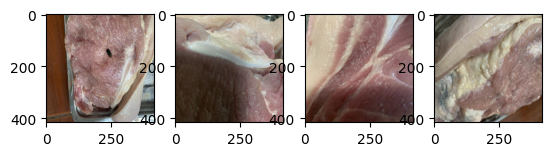

In [ ]:
plt.subplot(141)
plt.imshow(X_test[0])
print(np.argmax(model.predict(np.expand_dims(X_test[0],axis=0)),axis = 1))
plt.subplot(142)
plt.imshow(X_test[1])
print(np.argmax(model.predict(np.expand_dims(X_test[-1],axis=0)),axis = 1))
plt.subplot(143)
plt.imshow(X_test[2])
print(np.argmax(model.predict(np.expand_dims(X_test[1],axis=0)),axis = 1))
plt.subplot(144)
plt.imshow(X_test[3])
print(np.argmax(model.predict(np.expand_dims(X_test[3],axis=0)),axis = 1))
print("Examples and their predictions: 2 = spoiled , 1 = half-spoiled , 0 = fresh")

This predicted these four images correctly as (spoiled, spoiled, half-fresh, spoiled), and an eye test confirms this. The first 2 and the last one definetly look spoiled

## Modeling and Testing Pretrained MobileNetV2



In [ ]:

# Load the MobileNetV2 model without the top (fully connected) layers
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(416, 416, 3))

# Un - Freeze the convolutional layers
for layer in base_model.layers:
    layer.trainable = False

# Add three dense layers
x = Flatten()(base_model.output)
x = Dense(256, activation='relu')(x)
x = Dense(128, activation='relu')(x)
predictions = Dense(3, activation='softmax')(x)

# Create the final model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model (you can adjust the learning rate and other parameters)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()


9406464/9406464 [==============================] - 0s 0us/step
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 416, 416, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 208, 208, 32)         864       ['input_1[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 208, 208, 32)         128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (N

In [ ]:
#Train and save history
history = model.fit_generator(dataGenTrain.flow(X_train, y_train, batch_size=32),
          validation_data=dataGenTest.flow(X_valid, y_valid,
         batch_size=32), steps_per_epoch=len(X_train) / 32, epochs=50,workers=8, verbose = 1)
#Save model
model.save('PretrainedMobileNetBeefModel')

<ipython-input-17-02ec532cadb1>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(dataGenTrain.flow(X_train, y_train, batch_size=32),


Epoch 1/50
22/22 [==============================] - 51s 2s/step - loss: 20.0799 - accuracy: 0.5028 - val_loss: 0.7894 - val_accuracy: 0.8089
Epoch 2/50
22/22 [==============================] - 44s 1s/step - loss: 2.1080 - accuracy: 0.6831 - val_loss: 1.4403 - val_accuracy: 0.7733
Epoch 3/50
22/22 [==============================] - 44s 1s/step - loss: 1.0862 - accuracy: 0.8056 - val_loss: 0.7645 - val_accuracy: 0.8267
Epoch 4/50
22/22 [==============================] - 47s 1s/step - loss: 0.8911 - accuracy: 0.8155 - val_loss: 0.3993 - val_accuracy: 0.8533
Epoch 5/50
22/22 [==============================] - 43s 1s/step - loss: 0.8424 - accuracy: 0.8197 - val_loss: 0.5859 - val_accuracy: 0.8800
Epoch 6/50
22/22 [==============================] - 43s 1s/step - loss: 0.6338 - accuracy: 0.8380 - val_loss: 0.2522 - val_accuracy: 0.9022
Epoch 7/50
22/22 [==============================] - 44s 1s/step - loss: 0.5786 - accuracy: 0.8606 - val_loss: 0.1948 - val_accuracy: 0.9378
Epoch 8/50
22/22 [=

In [ ]:
#model = tf.keras.models.load_model('/content/gdrive/MyDrive/PretrainedMobileNetBeefModel')

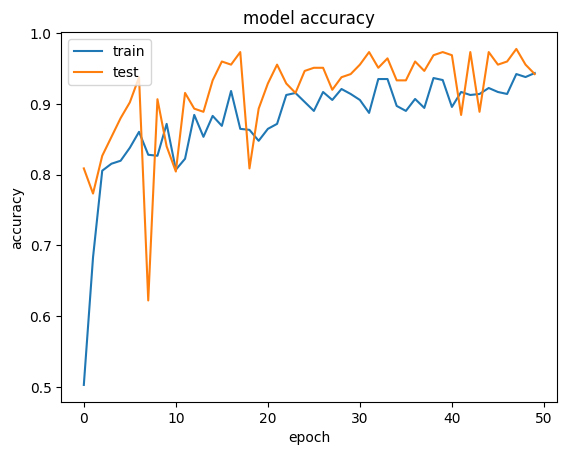

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Looks the same as VGG16, maybe with a little more variation. Other than that, same comments.

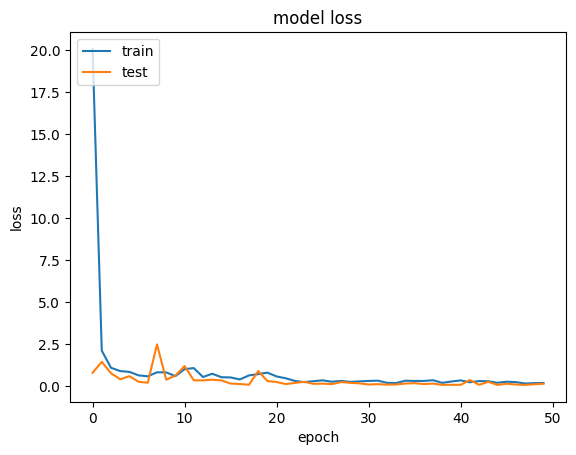

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Here loss seems to really be flattened out and converged. Here it seems more obvious that more epochs are useless.

In [ ]:
model.evaluate(X_test, y_test);

8/8 [==============================] - 2s 200ms/step - loss: 0.2269 - accuracy: 0.9071


Again, expected loss and accuracy.

In [ ]:
#Predict
y_pred = np.argmax(model.predict(X_test),axis = 1)

#Create confusion matrix and normalizes it over predicted (columns)
result = confusion_matrix(y_test, y_pred , normalize='pred')
result

8/8 [==============================] - 1s 142ms/step


array([[0.8255814 , 0.06097561, 0.        ],
       [0.1744186 , 0.92682927, 0.        ],
       [0.        , 0.01219512, 1.        ]])

Same issue here with overpredicting fresh, even worse this time. Very problematic for a user. Now perfect accuracy when predicting spoiled. Expecting increase in precision.

In [ ]:
print("precision: " , np.round(precision_score(y_test, y_pred , average="macro"), 4))
print("recall: " , np.round(recall_score(y_test, y_pred , average="macro"), 4))
print("f1: " , np.round(f1_score(y_test, y_pred , average="macro"), 4))

precision:  0.9175
recall:  0.9175
f1:  0.9155


We see the expected slight increase in precision score, but relatively unremarkable difference.

# Chicken Classification Code

## Load Dataset

In [15]:
def loadTrain():
  X = []
  y = []
  for filename in os.listdir('/content/gdrive/My Drive/dataset 400x400/training/busuk' ): #loop through file in train or test
      f = os.path.join('/content/gdrive/My Drive/dataset 400x400/training/busuk' , filename)

      X.append(np.array(Image.open(f)))
      y.append(1)

  for filename in os.listdir('/content/gdrive/My Drive/dataset 400x400/training/segar' ): #loop through file in train or test
      f = os.path.join('/content/gdrive/My Drive/dataset 400x400/training/segar' , filename)

      X.append(np.array(Image.open(f)))
      y.append(0)

  X = np.asarray(X)
  y = np.asarray(y)
  print(X.shape, y.shape)
  return X, y

In [16]:
def loadValid():
  X = []
  y = []
  for filename in os.listdir('/content/gdrive/My Drive/dataset 400x400/validation/busuk' ): 
      f = os.path.join('/content/gdrive/My Drive/dataset 400x400/validation/busuk' , filename)

      X.append(np.array(Image.open(f)))
      y.append(1)

  for filename in os.listdir('/content/gdrive/My Drive/dataset 400x400/validation/segar' ):
      f = os.path.join('/content/gdrive/My Drive/dataset 400x400/validation/segar' , filename)

      X.append(np.array(Image.open(f)))
      y.append(0)

  X = np.asarray(X)
  y = np.asarray(y)
  print(X.shape, y.shape)
  return X, y

In [24]:
def loadTest():
  X = []
  y = []
  for filename in os.listdir('/content/gdrive/My Drive/dataset 400x400/testing/busuk_segar' ): 
      f = os.path.join('/content/gdrive/My Drive/dataset 400x400/testing/busuk_segar' , filename)
      if 'busuk_0' in f:
        y.append(1)
      elif 'segar_0' in f:
        y.append(0)


      X.append(np.array(Image.open(f)))

  X = np.asarray(X)
  y = np.asarray(y)
  print(X.shape, y.shape)
  return X, y

In [17]:
#training data and shape
X_train, y_train = loadTrain()

(349, 400, 400, 3) (349,)


In [18]:
#validation data and shape
X_valid, y_valid = loadValid()

(42, 400, 400, 3) (42,)


In [25]:
#testing data and shape
X_test, y_test = loadTest()
X_test = X_test/255

(42, 400, 400, 3) (42,)


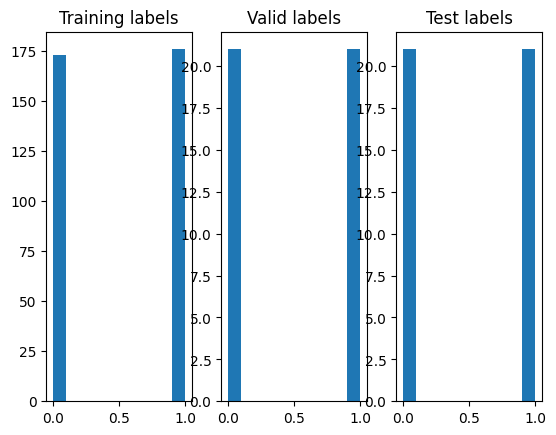

In [26]:
plt.subplot(131)
plt.hist(y_train);
plt.title("Training labels")
plt.subplot(132)
plt.hist(y_valid);
plt.title("Valid labels")
plt.subplot(133)
plt.hist(y_test);
plt.title("Test labels");

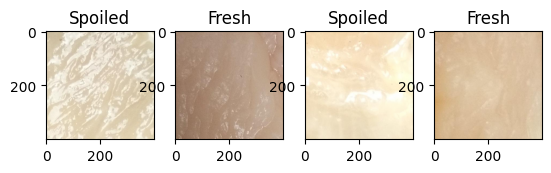

In [27]:
plt.subplot(141)
plt.imshow(X_train[0])
plt.title("Spoiled")
plt.subplot(142)
plt.imshow(X_train[-1])
plt.title("Fresh");
plt.subplot(143)
plt.imshow(X_train[1])
plt.title("Spoiled")
plt.subplot(144)
plt.imshow(X_train[-2])
plt.title("Fresh");

We an visually see a difference in color and texture with these examples. This tells us a CNN should do well. 

In [28]:
X_train, y_train = shuffle(X_train, y_train, random_state=42)
dataGenTrain.fit(X_train)
dataGenTest.fit(X_valid)

## Modeling and Testing (Pretrained VGG16)

In [29]:
# Load the VGG16 model without the top (fully connected) layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(400, 400, 3))

# Freeze the convolutional layers
for layer in base_model.layers:
    layer.trainable = False

# Add three dense layers
x = Flatten()(base_model.output)
x = Dense(256, activation='relu')(x)
x = Dense(128, activation='relu')(x)
predictions = Dense(2, activation='softmax')(x)

# Create the final model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model (you can adjust the learning rate and other parameters)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

58889256/58889256 [==============================] - 0s 0us/step


In [30]:
history = model.fit(dataGenTrain.flow(X_train, y_train, batch_size=32),
          validation_data=dataGenTest.flow(X_valid, y_valid,
         batch_size=32), steps_per_epoch=len(X_train) / 32, epochs=50, verbose = 1)
model.save('/content/gdrive/My Drive/PretrainedVGG16ChickenModel')


Epoch 1/50
10/10 [==============================] - 38s 2s/step - loss: 2.8593 - accuracy: 0.5244 - val_loss: 0.6144 - val_accuracy: 0.5000
Epoch 2/50
10/10 [==============================] - 18s 2s/step - loss: 0.5756 - accuracy: 0.6762 - val_loss: 0.3689 - val_accuracy: 0.8095
Epoch 3/50
10/10 [==============================] - 19s 2s/step - loss: 0.5255 - accuracy: 0.7393 - val_loss: 0.2905 - val_accuracy: 0.8810
Epoch 4/50
10/10 [==============================] - 21s 2s/step - loss: 0.4836 - accuracy: 0.7679 - val_loss: 0.2259 - val_accuracy: 0.9286
Epoch 5/50
10/10 [==============================] - 17s 2s/step - loss: 0.3096 - accuracy: 0.8711 - val_loss: 0.4465 - val_accuracy: 0.7143
Epoch 6/50
10/10 [==============================] - 17s 2s/step - loss: 0.3337 - accuracy: 0.8338 - val_loss: 0.1668 - val_accuracy: 0.9762
Epoch 7/50
10/10 [==============================] - 18s 2s/step - loss: 0.2717 - accuracy: 0.8768 - val_loss: 0.1713 - val_accuracy: 0.9762
Epoch 8/50
10/10 [==

In [ ]:
#model = tf.keras.models.load_model('/content/gdrive/MyDrive/PretrainedVGG16ChickenModel')

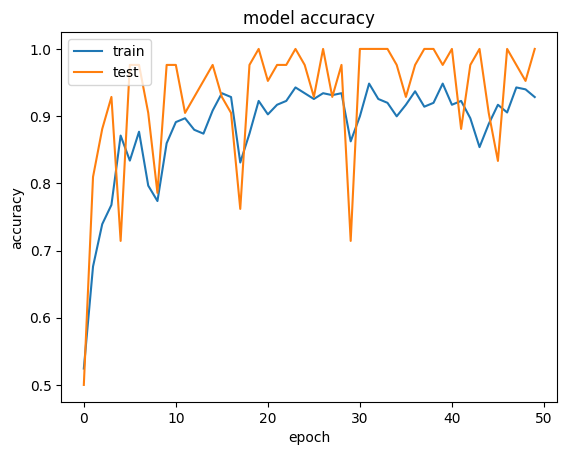

In [31]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

High variation in the accuracy in epochs, tells us it hasnt converged and needs more epochs.

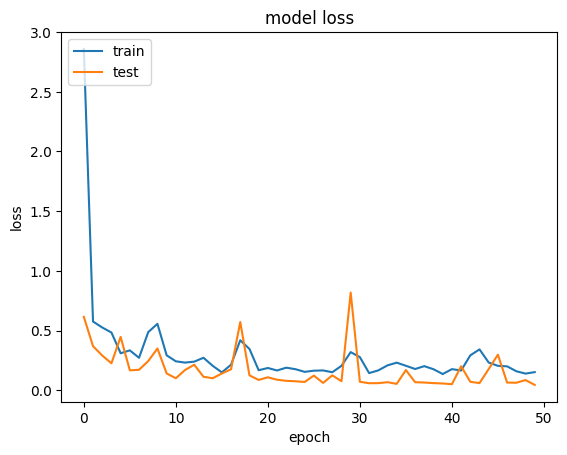

In [32]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Same conclusion as above.

In [33]:
model.evaluate(X_test, y_test);

2/2 [==============================] - 1s 175ms/step - loss: 0.3407 - accuracy: 0.9048


Decent accuracy, but we expected better based on what we saw in the dataset

In [34]:
#Predict
y_pred = np.argmax(model.predict(X_test),axis = 1)

#Create confusion matrix and normalizes it over predicted (columns)
result = confusion_matrix(y_test, y_pred , normalize='pred')
result

2/2 [==============================] - 1s 457ms/step


array([[0.9047619, 0.0952381],
       [0.0952381, 0.9047619]])

Good looking confusion matrix, no real overpediction in one direction.

In [35]:
print("precision: " , np.round(precision_score(y_test, y_pred , average="macro"), 4))
print("recall: " , np.round(recall_score(y_test, y_pred , average="macro"), 4))
print("f1: " , np.round(f1_score(y_test, y_pred , average="macro"), 4))

precision:  0.9048
recall:  0.9048
f1:  0.9048


Because of the cell above, these scores are good. We like to see this, especially for a problem where we really do not want to mispredict a spoiled observation a clean.

## Modeling and Testing (Pretrained MobileNetV2)

In [38]:
# Load the MobileNet model without the top (fully connected) layers
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(400, 400, 3))

#Freeze layers
for layer in base_model.layers:
    layer.trainable = False

# Add three dense layers
x = Flatten()(base_model.output)
x = Dense(256, activation='relu')(x)
x = Dense(128, activation='relu')(x)
predictions = Dense(2, activation='softmax')(x)

# Create the final model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model (you can adjust the learning rate and other parameters)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

9406464/9406464 [==============================] - 0s 0us/step


In [40]:
history = model.fit(dataGenTrain.flow(X_train, y_train, batch_size=32),
          validation_data=dataGenTest.flow(X_valid, y_valid,
         batch_size=32), steps_per_epoch=len(X_train) / 32, epochs=50, verbose = 1)
model.save('/content/gdrive/My Drive/PretrainedMobileNetChickenModel')


Epoch 1/50
10/10 [==============================] - 19s 2s/step - loss: 20.0061 - accuracy: 0.6819 - val_loss: 3.8901 - val_accuracy: 0.8333
Epoch 2/50
10/10 [==============================] - 16s 1s/step - loss: 2.4762 - accuracy: 0.8768 - val_loss: 2.1265 - val_accuracy: 0.9286
Epoch 3/50
10/10 [==============================] - 15s 1s/step - loss: 2.3656 - accuracy: 0.9026 - val_loss: 1.2345 - val_accuracy: 0.9048
Epoch 4/50
10/10 [==============================] - 15s 1s/step - loss: 0.8408 - accuracy: 0.9312 - val_loss: 1.6704 - val_accuracy: 0.8571
Epoch 5/50
10/10 [==============================] - 15s 1s/step - loss: 1.3362 - accuracy: 0.8883 - val_loss: 1.2441 - val_accuracy: 0.8810
Epoch 6/50
10/10 [==============================] - 16s 1s/step - loss: 2.0437 - accuracy: 0.8883 - val_loss: 1.6189 - val_accuracy: 0.9048
Epoch 7/50
10/10 [==============================] - 15s 1s/step - loss: 2.0787 - accuracy: 0.8797 - val_loss: 1.3679 - val_accuracy: 0.9286
Epoch 8/50
10/10 [=

In [ ]:
#model = tf.keras.models.load_model('/content/gdrive/MyDrive/PretrainedMobileNetChickenModel')

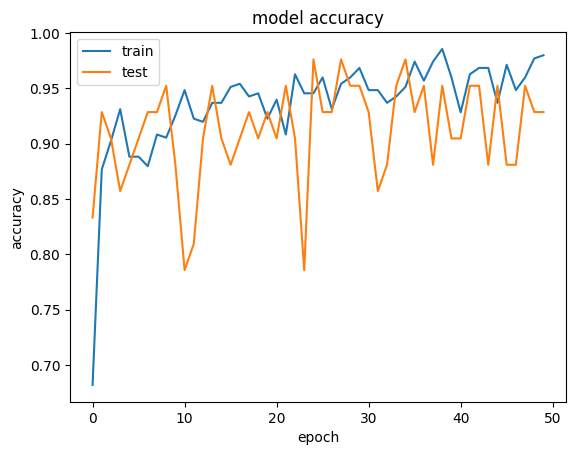

In [41]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Even more variation with Unet. Probably because less parameters and lighter weight, it does even worse with less epochs.

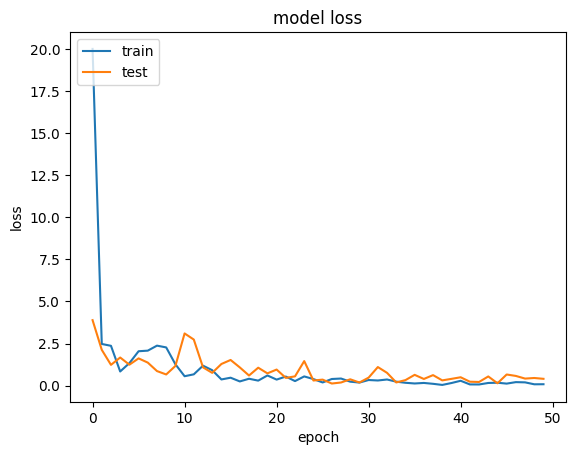

In [42]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Actually looks pretty converged here, which is strange. Might just be coincidence.

In [43]:
model.evaluate(X_test, y_test);

2/2 [==============================] - 0s 61ms/step - loss: 0.4807 - accuracy: 0.8333


Bad accuracy. This is unnexpected. Again the accuracy graph hints that the model did not have time to converge. 

In [44]:
#Predict
y_pred = np.argmax(model.predict(X_test),axis = 1)

#Create confusion matrix and normalizes it over predicted (columns)
result = confusion_matrix(y_test, y_pred , normalize='pred')
result

2/2 [==============================] - 1s 116ms/step


array([[0.76923077, 0.0625    ],
       [0.23076923, 0.9375    ]])

Here is a serious issue with overpredicting fresh when the label is actually spoiled. It is unknow why it does this but needs to be corrected. Telling someone thier meat is fresh when it is rotten is very bad. Telling someone their meat is rotten when it is fresh is better, so ideally the model would air in that direction. 

In [45]:
print("precision: " , np.round(precision_score(y_test, y_pred , average="macro"), 4))
print("recall: " , np.round(recall_score(y_test, y_pred , average="macro"), 4))
print("f1: " , np.round(f1_score(y_test, y_pred , average="macro"), 4))

precision:  0.8534
recall:  0.8333
f1:  0.8309


These scores make sense. This model and number of epochs is ruled out because of this weak performance. 

Thanks for reading!